# convert API geojson file to several standard conform geojson files
API geojson files basically contain a list of geojson objects plus a `legend` list entry with the
plotting parameters



In [1]:
import requests
import geopandas
import json
import numpy as np
from datetime import datetime
import os

# parameters
#https://aeroval.met.no/pages/evaluation/?project=domos&experiment=Dust_AOD&station=ALL
project = 'domos-paper'
experiment = 'Dust_AOD'
# network = 'AeronetSun'
obsvar = 'od550dust'
model = 'EMEP'
basedir = "/home/jang/tmp/DOMOS/"

url = f"https://api.aeroval.met.no/api/0.2.1/file/{project}/{experiment}/contour/{obsvar}_{model}.geojson"
# url = "https://api.aeroval.met.no/api/0.2.1/file/domos-paper/Dust_AOD/contour/od550dust_EMEP.geojson"
response = requests.get(url)
# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON data
    data = response.json()
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')

for _datecode in data:
    if _datecode == "legend":
        continue
    geojson = data[_datecode]
    timestamp = np.datetime64(int(_datecode), "ms")
    time_str = timestamp.astype(datetime).strftime("%Y%m%d")
    outfile = os.path.join(basedir,"-".join([experiment, obsvar, model, time_str + ".geojson"]))
    with open(outfile, 'w') as f:
        print(f"writing file {outfile}")
        json.dump(geojson, f)




writing file /home/jang/tmp/DOMOS/Dust_AOD-od550dust-EMEP-20200115.geojson
writing file /home/jang/tmp/DOMOS/Dust_AOD-od550dust-EMEP-20200215.geojson
writing file /home/jang/tmp/DOMOS/Dust_AOD-od550dust-EMEP-20200315.geojson
writing file /home/jang/tmp/DOMOS/Dust_AOD-od550dust-EMEP-20200415.geojson
writing file /home/jang/tmp/DOMOS/Dust_AOD-od550dust-EMEP-20200515.geojson
writing file /home/jang/tmp/DOMOS/Dust_AOD-od550dust-EMEP-20200615.geojson
writing file /home/jang/tmp/DOMOS/Dust_AOD-od550dust-EMEP-20200715.geojson
writing file /home/jang/tmp/DOMOS/Dust_AOD-od550dust-EMEP-20200815.geojson
writing file /home/jang/tmp/DOMOS/Dust_AOD-od550dust-EMEP-20200915.geojson
writing file /home/jang/tmp/DOMOS/Dust_AOD-od550dust-EMEP-20201015.geojson
writing file /home/jang/tmp/DOMOS/Dust_AOD-od550dust-EMEP-20201115.geojson
writing file /home/jang/tmp/DOMOS/Dust_AOD-od550dust-EMEP-20201215.geojson


# Read file and plot via geopandas

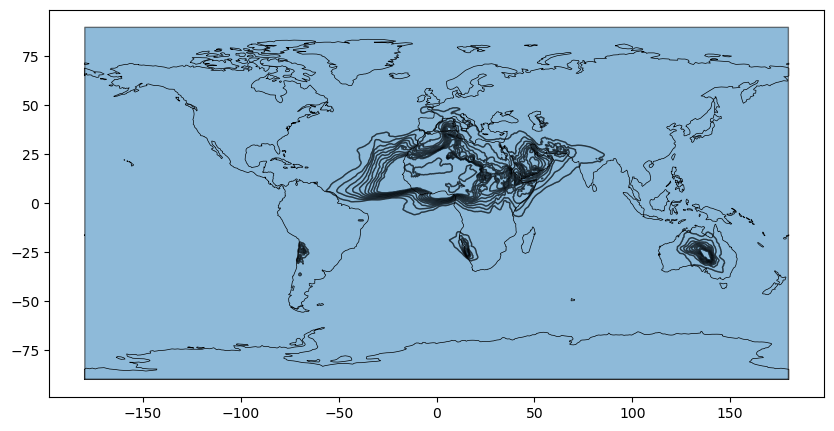

In [17]:
import geopandas as gpd
import geodatasets
import contextily as cx

file = "/home/jang/tmp/DOMOS/Dust_AOD-od550dust-EMEP-20200115.geojson"
geo_json = gpd.read_file(file)
world_url = geodatasets.get_url("naturalearth land")

world = gpd.read_file(geodatasets.get_url("naturalearth land"))

# df_wm = geo_json.to_crs(epsg=3857)
# ax = df_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
# cx.add_basemap(ax, crs=geo_json.crs)
ax = geo_json.plot(figsize=(10, 10), alpha=0.5, edgecolor="k",)
# start by plotting a map of the world
world.boundary.plot(
    ax=ax,
    color="black",
    linewidth=0.5
)

# cx.add_basemap(ax, crs=geo_json.crs)
import contextily as cx